### List of Imports 

In [167]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np 
from pprint import pprint
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle
import scipy
import patsy
import sys
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest

%matplotlib inline 

/Users/liyuqiao/anaconda/envs/py3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Versions 

In [169]:
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd), ('Scipy', scipy), ('Sklearn', sklearn))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.13.1
Pandas Version: 0.20.3
Scipy Version: 0.19.1
Sklearn Version: 0.19.0


### Read Data 

In [3]:
with open('../../Data/movies_clean.pickle', 'rb') as f:
    movies_df = pickle.load(f)

In [4]:
movies_df.corr()

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
Runtime (mins),1.000000,0.454603,0.404975,-0.107574,1.805475e-02,-4.788499e-02,0.140281,0.076124,0.006370,-0.084237,...,0.294106,0.209124,-0.137030,0.117078,2.711464e-01,0.185415,0.142297,0.203297,0.163866,0.089675
Opening Weekend Gross ($),0.454603,1.000000,0.934382,-0.103752,3.287649e-02,-8.520928e-02,0.226312,0.134477,0.075925,-0.085923,...,0.524152,0.514357,-0.410799,-0.000099,2.265556e-01,0.119916,0.123849,0.402285,0.238077,0.201329
DomesticTotalGross,0.404975,0.934382,1.000000,-0.116841,1.900779e-02,-8.717698e-02,0.157407,0.131882,0.082712,-0.093403,...,0.526995,0.580332,-0.406333,-0.006357,1.911683e-01,0.159722,0.096482,0.353372,0.191415,0.141377
Release Month_2,-0.107574,-0.103752,-0.116841,1.000000,-1.144929e-01,-7.838790e-02,-0.099850,-0.104369,-0.115899,-0.087083,...,-0.096421,-0.060423,0.000401,-0.082124,-6.497020e-02,-0.008179,-0.031877,-0.042334,-0.031877,-0.015877
Release Month_3,0.018055,0.032876,0.019008,-0.114493,1.000000e+00,-9.128709e-02,-0.116280,-0.121543,-0.134971,-0.101413,...,0.020627,0.015078,0.075951,0.001305,-8.132018e-17,0.065112,0.041763,0.010564,-0.037123,-0.018490
Release Month_4,-0.047885,-0.085209,-0.087177,-0.078388,-9.128709e-02,1.000000e+00,-0.079612,-0.083215,-0.092408,-0.069433,...,-0.001883,-0.048176,0.092800,-0.044657,-1.496296e-16,-0.046362,-0.025416,-0.033754,-0.025416,-0.012659
Release Month_5,0.140281,0.226312,0.157407,-0.099850,-1.162804e-01,-7.961173e-02,1.000000,-0.105998,-0.117708,-0.088443,...,0.031580,0.129064,-0.004020,-0.010681,9.008529e-02,0.039623,-0.032375,0.157137,-0.032375,0.159012
Release Month_6,0.076124,0.134477,0.131882,-0.104369,-1.215431e-01,-8.321488e-02,-0.105998,1.000000,-0.123036,-0.092446,...,0.095846,0.165528,0.047413,0.050432,-1.185262e-02,0.033482,0.050978,-0.044941,-0.033840,-0.016855
Release Month_7,0.006370,0.075925,0.082712,-0.115899,-1.349706e-01,-9.240803e-02,-0.117708,-0.123036,1.000000,-0.102659,...,0.063676,-0.071230,-0.145160,0.063891,5.339491e-02,-0.068548,0.118733,-0.049906,0.118733,-0.018717
Release Month_8,-0.084237,-0.085923,-0.093403,-0.087083,-1.014133e-01,-6.943297e-02,-0.088443,-0.092446,-0.102659,1.000000,...,-0.050353,-0.053520,-0.089001,-0.033948,-1.530534e-02,-0.051505,-0.028236,-0.037498,-0.028236,-0.014063


In [172]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 207
Data columns (total 34 columns):
Movie Title                  391 non-null object
Runtime (mins)               391 non-null float64
Opening Weekend Gross ($)    391 non-null float64
DomesticTotalGross           391 non-null float64
Release Month_2              391 non-null uint8
Release Month_3              391 non-null uint8
Release Month_4              391 non-null uint8
Release Month_5              391 non-null uint8
Release Month_6              391 non-null uint8
Release Month_7              391 non-null uint8
Release Month_8              391 non-null uint8
Release Month_9              391 non-null uint8
Release Month_10             391 non-null uint8
Release Month_11             391 non-null uint8
Release Month_12             391 non-null uint8
MPAA_PG/PG-13                391 non-null uint8
MPAA_R                       391 non-null uint8
MPAA_Unrated                 391 non-null uint8
Genre_3D                

In [173]:
movies_df.describe().head(2)

,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.00000,391.000000,391.00000,391.000000
mean,107.611253,34.315018,108.457329,0.089514,0.117647,0.058824,0.092072,0.099744,0.120205,0.071611,...,0.132992,0.035806,0.199488,0.150895,0.086957,0.033248,0.01023,0.017903,0.01023,0.002558


In [174]:
movies_df.shape

(391, 34)

### Dataset Standardization - removes the mean and scaling to unit variance 
L1 and L2 regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [175]:
not_y = movies_df.loc[:, movies_df.columns != 'DomesticTotalGross'] 
x = not_y.loc[:, not_y.columns != 'Movie Title']
y = movies_df.DomesticTotalGross

In [176]:
print('Model Features: ', x.columns)

Model Features:  Index(['Runtime (mins)', 'Opening Weekend Gross ($)', 'Release Month_2',
       'Release Month_3', 'Release Month_4', 'Release Month_5',
       'Release Month_6', 'Release Month_7', 'Release Month_8',
       'Release Month_9', 'Release Month_10', 'Release Month_11',
       'Release Month_12', 'MPAA_PG/PG-13', 'MPAA_R', 'MPAA_Unrated',
       'Genre_3D', 'Prod_Budget_Medium', 'Prod_Budget_Small',
       'Release_Limited', 'Release_Wild', 'Director_Above_10',
       'Director_Above_20', 'Director_Above_40', 'Director_Below_1',
       'Actors Rank_2', 'Actors Rank_3', 'Actors Rank_4', 'Actors Rank_5',
       'Actors Rank_6', 'Actors Rank_7', 'Actors Rank_8'],
      dtype='object')


In [177]:
print('Dimensionality of features:', x.shape)
print('Dimensionality of target:', (len(y),))

Dimensionality of features: (391, 32)
Dimensionality of target: (391,)


In [179]:
ssX = StandardScaler()
not_Y = movies_df[[x for x in movies_df.columns if x != 'DomesticTotalGross']] 
X = not_Y[[x for x in not_y.columns if x != 'Movie Title']]
Y = movies_df.DomesticTotalGross

### Train-Test Split - 10% of Data as Holdout for Validation

In [180]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

In [181]:
X_tr = ssX.fit_transform(X_train)
X_val = ssX.transform(X_val)

In [182]:
print('Dimensionality of training features:', X_train.shape)
print('Dimensionality of training target:', Y_train.shape)

Dimensionality of training features: (351, 32)
Dimensionality of training target: (351,)


##### Regression Statistics
R2: square of the correlation coefficient and represents the estimated percentage of the variance in our target variable Y that can be explained by our regression model. Adjusted R2 also penalizes for things such as large coefficients and extra variables to try and limit overfitting so it is often a better measure of model efficacy.

P(|t|) measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.
Putting it all together, the final column returns a 95% Confidence Interval for the value of each coefficient.

### Linear Regression Model 1: SkLearn 

In [183]:
df_train = pd.DataFrame(X_tr)
df_train.columns = [x.columns]

In [184]:
def sklearn_lr(feature,cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    lr = LinearRegression()
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    lr.fit(x_train, Y_train)
    score_ = cross_val_score(lr, x_train, Y_train, cv = cv, scoring = scoring)
    score_mean = score_.mean()
    intercept_ = lr.intercept_
    coef_ = lr.coef_
    print('|Mean score|: ', score_mean
          , '\n', 'Intercept|: ',intercept_, '\n', '|Coefs|: ', coef_)
    return lr 

In [185]:
sk_m1 = sklearn_lr(['Opening Weekend Gross ($)'])

|Mean score|:  -23.6968753917 
 Intercept|:  106.002712511 
 |Coefs|:  [ 111.31313094]


In [186]:
sk_m2 = sklearn_lr(['Opening Weekend Gross ($)'
                    ,'Genre_3D','MPAA_R','Prod_Budget_Medium','Director_Above_40'
                    ,'Release Month_12','Release_Wild','Release Month_11'
                    ,'Director_Above_10','Director_Above_20'])

|Mean score|:  -19.9045820166 
 Intercept|:  106.002712511 
 |Coefs|:  [  7.09517305e+01   8.31230499e+00  -3.68315173e+00   4.60661752e-02
   3.29824106e+01   8.34422478e+00  -2.15711366e+00   1.21472630e+00
   1.50905028e+01   3.15783544e+01]


In [187]:
sk_m3 = sklearn_lr(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Mean score|:  -19.2356940769 
 Intercept|:  106.002712511 
 |Coefs|:  [ 75.76631601   8.51564932  34.1771975    8.31471642   1.49753115
  -6.88893627  14.53742365  30.27812409  -5.32878522]


### Linear Regression Model 2 - Lasso Regression (L1)

In [188]:
# def adj_r2(rsquare, num_data, num_features):
#     temp = (1-rsquare)*(num_data-1)
#     temp = temp/(num_data-num_features-1)
#     temp = 1 - temp
#     return temp

In [189]:
def lasso_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Lasso(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_lasso = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_lasso.intercept_
    best_coefs = best_lasso.coef_
    print('|Best Lasso|: ',best_lasso
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)
    return best_lasso

In [190]:
# 5-fold CV, scoring with negative MAE, 1 feature: 
best_lasso_I1 = lasso_modeling(['Opening Weekend Gross ($)'])

|Best Lasso|:  Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -23.7040668584 
 |Intercept|:  106.002712511 
 |Coefficients|:  [ 111.31312094]


##### _Out of all models w/ Lasso(w/ different combination of features) tested, the one below returns the hightst R^2._

In [191]:
best_lasso_I2 = lasso_modeling(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Best Lasso|:  Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -19.1798172164 
 |Intercept|:  106.002712511 
 |Coefficients|:  [ 76.82369763   7.9999067   31.63541507   7.39453565   0.73588028
  -5.4832455   12.86886383  28.30175491  -3.83419783]


### Linear Regression Model 3 - Ridge Regression (L2)

In [192]:
def ridge_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = Ridge(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_ridge = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_ridge.intercept_
    best_coefs = best_ridge.coef_
    print('|Best Ridge|: ',best_ridge
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [193]:
best_ridge_I1 = ridge_modeling(['Opening Weekend Gross ($)'])

|Best Ridge|:  Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -23.7040658627 
 |Intercept|:  106.002712511 
 |Coefficients|:  [ 111.31312777]


##### _Out of all models w/ L2 (w/ different combination of features) tested, the one below returns the highest R^2._ 

In [194]:
best_ridge_I2 = ridge_modeling(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Best Ridge|:  Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, random_state=None, solver='auto', tol=0.001) 
 |Score (Neg MAE)|:  -19.2397367423 
 |Intercept|:  106.002712511 
 |Coefficients|:  [ 75.76631163   8.51565013  34.17719823   8.31471593   1.49753111
  -6.88893529  14.53742432  30.27812553  -5.32878398]


### Linear Regression Model 4 - ElasticNet

In [195]:
def elasticnet_modeling(feature, cv = 5, scoring = 'neg_mean_absolute_error'):
    x_train = df_train[feature]
    shape = len(feature)
    x_train = x_train.values.reshape(-1,shape)
    model = ElasticNet(max_iter=5000)
    parameters = {'alpha': [1e-5,1e-3,1e-1,1], 'fit_intercept': [True,False]}
    grid = GridSearchCV(model,parameters, cv=cv, scoring=scoring, n_jobs=1)
    grid.fit(x_train, Y_train)
    best_en = grid.best_estimator_
    best_score = grid.best_score_
    best_params = grid.best_params_
    best_intercept = best_en.intercept_
    best_coefs = best_en.coef_
    print('|Best ElesticNet|: ',best_en
          ,'\n','|Score (Neg MAE)|: ',best_score
          ,'\n','|Intercept|: ',best_intercept
          ,'\n','|Coefficients|: ',best_coefs)

In [196]:
best_en_I1 = elasticnet_modeling(['Opening Weekend Gross ($)'])

|Best ElesticNet|:  ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -23.7041580813 
 |Intercept|:  106.002712511 
 |Coefficients|:  [ 111.31256938]


In [197]:
best_en_I2 = elasticnet_modeling(['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6'])

|Best ElesticNet|:  ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False) 
 |Score (Neg MAE)|:  -19.239682345 
 |Intercept|:  106.002712511 
 |Coefficients|:  [ 75.69066711   8.52964832  34.18824678   8.30569404   1.49648908
  -6.87117705  14.5479992   30.30192041  -5.30634302]


#### So the best model turns out to be best_lasso_I2, which has the lowest MAE of all that's been tested.
Model:  
Lasso  

Parameters:  
alpha=1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False    
   
   
Features:  
Opening Weekend Gross ($),  
Genre_3D,  
Director_Above_40,  
Release Month_12,  
Release Month_11,  
Actors Rank_8,  
Director_Above_10,  
Director_Above_20,  
Actors Rank_6


### Apply the best model on testing set & Make predictions

In [198]:
best_lasso_I2.coef_

array([ 76.82369763,   7.9999067 ,  31.63541507,   7.39453565,
         0.73588028,  -5.4832455 ,  12.86886383,  28.30175491,  -3.83419783])

In [199]:
best_lasso_I2.intercept_

106.00271251136708

### Model: 
Domestic Total Gross =   
106.0 + 76.8 x Opening Weekend Gross + 8.0 x Genre_3D + 31.6 x Director_Above_40 +     
7.4 x Release Month_12 + 0.7 x Release Month_11 - 5.5 x Actors Rank_8 +   
12.9 x Director_Above_10 + 28.3 x Director_Above_20 - 3.8 x Actors Rank_6   

In [200]:
df_val = pd.DataFrame(X_val)
df_val.columns = [x.columns]
X_val = df_val[['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6']]
X_val = X_val.values.reshape(-1,9)

In [201]:
lasso_pred = best_lasso_I2.predict(X_val)
for true,pred in zip(Y_val, lasso_pred):
    resid = true - pred
    print("pred, resid:", str(pred) + ", $"+ str(resid))

pred, resid: 402.576807559, $9.46200144134
pred, resid: 244.73799972, $-3.32762172003
pred, resid: 197.55061624, $-81.2927684952
pred, resid: 3.3475782621, $-3.2485922621
pred, resid: 124.77413553, $3.22823647032
pred, resid: 311.181713642, $-15.1984086422
pred, resid: 246.327133593, $-32.2966335928
pred, resid: 6.07594489073, $-6.03925589073
pred, resid: 18.2237846497, $-1.21361464971
pred, resid: 115.184739309, $4.25203069066
pred, resid: 12.7733284072, $-0.532206407239
pred, resid: 62.765856456, $9.91342154402
pred, resid: 178.4375123, $-5.87863630021
pred, resid: 42.7458703804, $-7.45480238042
pred, resid: 3.31344039543, $-3.20188939543
pred, resid: 28.871367064, $3.12893693603
pred, resid: 164.846426713, $-18.5574747125
pred, resid: 315.362950183, $53.0213798167
pred, resid: 134.059683092, $-30.9153970919
pred, resid: 37.0796074072, $-18.0043174072
pred, resid: 690.182602939, $246.479622061
pred, resid: 54.0619482659, $-13.5825782659
pred, resid: 3.33052753024, $-3.29776153024
pre

In [202]:
x_train = df_train[['Opening Weekend Gross ($)'
                    ,'Genre_3D','Director_Above_40','Release Month_12'
                    ,'Release Month_11','Actors Rank_8'
                    ,'Director_Above_10','Director_Above_20'
                    ,'Actors Rank_6']]
x_train = x_train.values.reshape(-1,9)

### Compare Predicted v.s. Actual

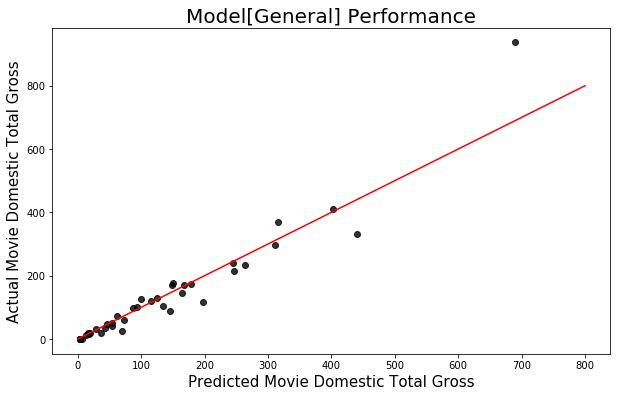

In [252]:
plt.figure(figsize=(10, 6))
plt.scatter(lasso_pred,Y_val,alpha=0.8,color='k')
plt.plot(np.linspace(0,800,1000),np.linspace(0,800,1000),color='r')
plt.xlabel('Predicted Movie Domestic Total Gross', fontsize=15)
plt.ylabel('Actual Movie Domestic Total Gross', fontsize=15)
plt.title('Model[General] Performance', fontsize=20)


plt.savefig('../../Images/model_general performance.png', dpi=200, bbox_inches = 'tight')

### Plotting Residuals

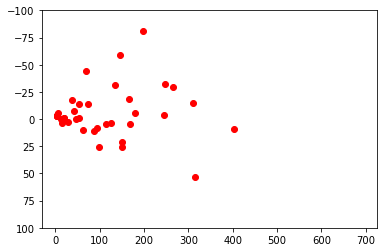

In [207]:
def residual_scatter(model, x, y, color):
    lasso_pred = model.predict(x)
    residual_ = []
    pred_ = []
    for true,pred in zip(y, lasso_pred):
        resid = true - pred
        residual_.append(resid)
        pred_.append(pred)
    residual_scatter = plt.scatter(pred_, residual_, color = color)
    plt.ylim(100,-100)
#     return (residual_scatter, residual_hist) 
#         print("pred, resid:", str(pred) + ", $"+ str(resid))
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')
residual_scatter(best_lasso_I2, X_val, Y_val, 'r',)

NormaltestResult(statistic=54.042287598680495, pvalue=1.8402056222284366e-12)

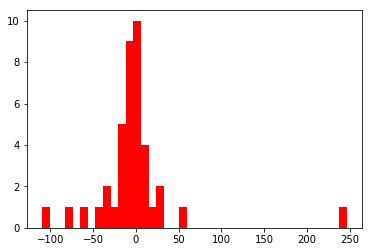

In [208]:
def residual_hist(model, x, y, color, outlier_value=260):
    lasso_pred = model.predict(x)
    residual_ = []
    for true,pred in zip(y, lasso_pred):
        resid = true - pred
        residual_.append(resid)
        residual_ = [i for i in residual_ if abs(i) < outlier_value]
    residual_hist = plt.hist(residual_, color = color, bins=40)
    return normaltest(residual_)
# residual_plot(best_lasso_I2, x_train, Y_train, 'k')

residual_hist(best_lasso_I2, X_val, Y_val, 'r', 260)

NormaltestResult(statistic=4.7851614697328433, pvalue=0.091393516830865232)

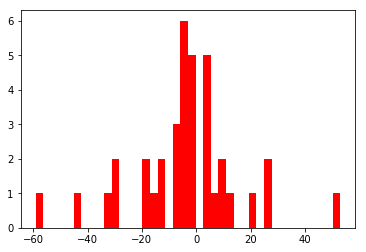

In [231]:
residual_hist(best_lasso_I2, X_val, Y_val, 'r', 80)


NormaltestResult(statistic=55.75492970040343, pvalue=7.8157533620422533e-13)

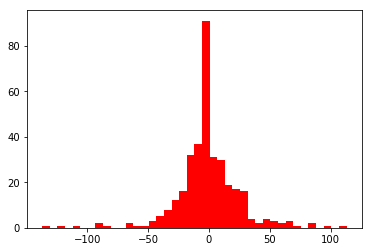

In [232]:
residual_hist(best_lasso_I2, x_train, Y_train, 'r', 240)

In [210]:
Y_val

9      412.038809
42     241.410378
33     116.257848
83       0.098986
170    128.002372
187    295.983305
55     214.030500
91       0.036689
14      17.010170
15     119.436770
36      12.241122
58      72.679278
77     172.558876
11      35.291068
97       0.111551
42      32.000304
94     146.288952
15     368.384330
27     103.144286
42      19.075290
0      936.662225
1       40.479370
166      0.032766
86      46.462469
79     169.700110
34      98.780042
29     101.704370
41      18.730891
13      52.000688
103      0.177404
196     17.303424
46     234.911825
33      25.020758
73     177.002924
52       0.032111
78     172.062763
156     87.242834
25     330.360194
10     124.987023
70      60.128566
Name: DomesticTotalGross, dtype: float64

In [147]:
movies_df[movies_df['Movie Title']=='Fifty Shades Darker'].loc[:,'DomesticTotalGross']

37    114.43401
Name: DomesticTotalGross, dtype: float64

In [226]:
a = x_train[90]

In [227]:
best_lasso_I2.predict(a.reshape(1, -1))

array([ 3.33900133])

(array([ 158.,   77.,   47.,   35.,   22.,   16.,    8.,   11.,    8.,
           2.,    2.,    1.,    0.,    2.,    0.,    0.,    1.,    0.,
           0.,    1.]),
 array([  1.18100000e-03,   4.68342332e+01,   9.36672854e+01,
          1.40500338e+02,   1.87333390e+02,   2.34166442e+02,
          2.80999494e+02,   3.27832546e+02,   3.74665599e+02,
          4.21498651e+02,   4.68331703e+02,   5.15164755e+02,
          5.61997807e+02,   6.08830860e+02,   6.55663912e+02,
          7.02496964e+02,   7.49330016e+02,   7.96163068e+02,
          8.42996121e+02,   8.89829173e+02,   9.36662225e+02]),
 <a list of 20 Patch objects>)

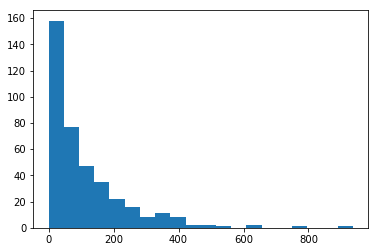

In [235]:
plt.hist(movies_df.DomesticTotalGross,bins=20)

In [245]:
movies_df[movies_df.DomesticTotalGross > 450]

,Movie Title,Runtime (mins),Opening Weekend Gross ($),DomesticTotalGross,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,...,Director_Above_20,Director_Above_40,Director_Below_1,Actors Rank_2,Actors Rank_3,Actors Rank_4,Actors Rank_5,Actors Rank_6,Actors Rank_7,Actors Rank_8
0,Star Wars: The Force Awakens,136.0,247.966675,936.662225,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,Avatar,160.0,77.025481,749.766139,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,Jurassic World,124.0,208.806270,652.270625,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
3,Marvel's The Avengers,142.0,207.438708,623.357910,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
4,Rogue One: A Star Wars Story,133.0,155.081681,532.177324,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,Beauty and the Beast,129.0,174.750616,504.014165,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,Finding Dory,103.0,135.060273,486.295561,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7,Avengers: Age of Ultron,141.0,191.271109,459.005868,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


### Model Results 

In [203]:
# adjusted r2

def adj_r2(rsquare, num_data, num_features):
    temp = (1-rsquare)*(num_data-1)
    temp = temp/(num_data-num_features-1)
    temp = 1 - temp
    return temp

adj_r2(r2_score(Y_val,lasso_pred),X_tr.shape[0],X_tr.shape[1])

0.90757169691443684

In [204]:
# Standard Error of the Estimate

def standard_error_estimate(true,pred,num_data):
    sse = 0
    for y,ypred in zip(true,pred):
        sse += (y-ypred)**2
    return np.sqrt(sse/(num_data-2))

standard_error_estimate(Y_val,lasso_pred,X_tr.shape[0])

16.428632461129197

In [205]:
def test_model_results(true, X, pred):
    pri### Model Results nt("Mean Squared Error: ", mean_squared_error(true,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(true,pred)))
    print("Mean Absolute Error: ",mean_absolute_error(true,pred))
    r2 = r2_score(true,pred)
    print("R2: ", r2)
    print("Adj R2: ", adj_r2(r2,X.shape[0],X.shape[1]))
    print("Standard Error of Estimate: ", standard_error_estimate(true,pred,X.shape[0]))
          
test_model_results(Y_val, X_tr, lasso_pred)

Mean Squared Error:  2354.87719064
Root Mean Squared Error:  48.5270768812
Mean Absolute Error:  23.4668361059
R2:  0.916022284625
Adj R2:  0.907571696914
Standard Error of Estimate:  16.4286324611
